<a href="https://colab.research.google.com/github/Kelvin-ndungu/Kelvin-ndungu/blob/main/wordcloud_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






# Introduction


---
This project is aimed at ensuring one can automate the generation of wordclouds from a text file.  

This project can be used in analyzing custumer reviews, product reviews, or job postings. 





# Setting up the environment


---
Loading all the relevant libraries


In [37]:
#loading all the important libraries
import pandas as pd #for reading csv file
from wordcloud import WordCloud #for creating a wordcloud  
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline



# Word Cloud Generator Class

In [38]:
# Define the class

class wordcloud(object):
  #we define the class that will initialize the text that will be analysed and the file name in which it will be stored. 

  def __init__(self, text = "text", file = "wordcloud.png"):
    self.text = text
    self.file = file

  #Add a method for creating the word cloud
  def draw_wordcloud(self):
    #create variables to hold lists of punctuations, prepositions, conjuctions, and pronons 
    #variable holding all punctuations
    punctuation_list = [",", ".", "?", "-", "!",":", ";","{", "}", "(", ")", "[", "]", "...", "_"]

    #creating a list from a text from a string using split() function
    #a list containing pronouns(109)
    pronoun_list = "all another,any,anybody,anyone,anything,as,aught,both,each,each other,either,enough,everybody,everyone,everything,few,he,her,hers,herself,him,himself,his,I,idem,it,its,itself,many,me,mine,most,my,myself,naught,neither,no one,nobody,none,nothing,one,one another,other,others,ought,our,ours,ourself,ourselves,several,she,some,somebody,someone,something,somewhat,such,suchlike,that,thee,their,theirs,theirself,theirselves,them,themself,themselves,there,these,they,this,those,us,we,what,whatever,whatnot,whatsoever,whence,where,whereby,wherefrom,wherein,whereinto,whereof,wheresoever,whereto,whereunto,wherever,wherewith,wherewithal,whether,which,whichever,whichsoever,who,whoever,whom,whomever,whomso,whomsoever,whose,whosesoever,whosever,whosoever,you,your,yours,yourself,yourselves".split(",")
    
    #a list containing prepositions(103)
    preposition_list = "abroad,about,above,according to,across,after,against,ago,ahead of,along,amidst,among,amongst,apart,around,as,as far as,as well as,aside,at,away,barring,because of,before,behind,below,beneath,beside,besides,between,beyond,but,by,by means of,circa,concerning,despite,down,due to,during,in,in accordance with,in addition to,in case of,in front of,in lieu of,in place of,in spite of,in to,inside,instead of,into,except,except for,excluding,for,following,from,hence,like,minus,near,next,next to,past,per,prior to,round,off,on,on account of,on behalf of,on to,on top of,onto,opposite,out,out from,out of,outside,over,owing to,than,through,throughout,till,times,to,toward,towards,under,underneath,unlike,until,unto,up,upon,via,with,with a view to,within,without,worth".split(",")
    
    #a list containing conjuctions
    conjuction_list = "and,for,not,but,or,yes,so,both,not only,but also,either,neither,just,the,as,if,then,than,rather,no sooner,such,after,although,as if,as long as,as much as,as soon as,as far as,as though,by the time,in as much as,inasmuch,in order to,in order that,in case,lest,though,now that,now since,now when,now,even if,even,even though,provided,provide that,if then,if when,if only,just as,where,wherever,whereas,where if,whether,since,because,whose,whoever,unless,while,before,why,so that,until,how,till,whenever,supposing,when,or not,what".split(",")
    
    #combining all words that needs to be removed
    remove_list = pronoun_list[:]
    remove_list.extend(preposition_list)
    remove_list.extend(conjuction_list)

    #use text to remove all punctuations 
    for x in punctuation_list:
      self.text = self.text.replace(x, " ")
      

    #use text to remove all words in the remove list
    for y in remove_list:
      self.text = self.text.replace((" "+ y+ " "), " ")

    #create a word cloud file
    wordcloud = WordCloud(width = 1600, height = 800).generate(self.text.lower())

    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.show()

    wordcloud.to_file("/content/sample_data/"+self.file)




# Create a Wordcloud for Data Analyst Job Descriptions and Save it

Now lets create wordtext that we can feed to the wordcloud class to 

generate a wordcloud.

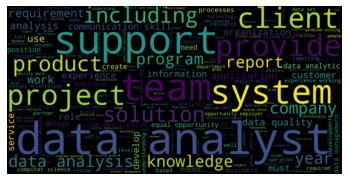

In [11]:
#define variables for the word_file

file_name = "data_analyst.png"

data_analyst_description = pd.read_csv("/content/drive/MyDrive/Colab files/DataAnalyst.csv")


#rename the column of intrest
data_analyst_description.rename(columns = {"Job Description":"job_description"}, inplace = True)



#join the job_description column into one file 
job_descriptions = " ".join(desc for desc in data_analyst_description.job_description)

#we create a wordcloud object

data_analyst_keywords = wordcloud(job_descriptions, file_name)

#use the method draw wordcloud to generate a word cloud
data_analyst_keywords.draw_wordcloud()

# We create other wordclouds from car reviews

In this case, we will use a dataset of five luxury brands on kaggle(https://www.kaggle.com/datasets/ashisparida/reviews-of-5-car-brands)

In [43]:
#first we load the dataset

car_reviews = pd.read_csv("/content/drive/MyDrive/Colab files/car_5_brands.csv")

#car_reviews.head()
#We find  unique brands

#pd.unique(car_reviews["brand_name"]) #returns the five brands: Audi, Lexus, INFINITI, BMW, Mercedes_Benz

#create five variables containing the reviews for each brand

audi_reviews = car_reviews[car_reviews.brand_name == "Audi"] #len(audi_reviews) returns 6043

lexus_reviews = car_reviews[car_reviews.brand_name == "Lexus"] #len(lexus_reviews) returns 6153

infiniti_reviews= car_reviews[car_reviews.brand_name == "INFINITI"] #len(infiniti_reviews) returns 4307

bmw_reviews = car_reviews[car_reviews.brand_name == "BMW"] #len(bmw_reviews) returns 8060

mercedes_benz_reviews = car_reviews[car_reviews.brand_name == "Mercedes-Benz"] #len(mercedes_benz_reviews) returns 7375
 

# Join all reviews into one text file that will be used for generating the word clouds


review_audi = " ".join(desc for desc in audi_reviews.review)

review_lexus = " ".join(desc for desc in lexus_reviews.review)

review_infiniti= " ".join(desc for desc in infiniti_reviews.review)

review_bmw = " ".join(desc for desc in bmw_reviews.review)

review_mercedes = " ".join(desc for desc in mercedes_benz_reviews.review)


'BEST ALL AROUND PURPOSE CROSSOVER SUV I have never seen or driven a car like this before.  I\'ve owned BMW 3, 5, and 7 series, Porsche 911, and Mercedes SL 55 and a Honda Pilot.  The SQ5  is a combination of all of them.  Its rides very comfortably, very stable, and quiet, sporty and with a lot of power and torque. Its a get up and go car, great to drive anywhere in the city or country.  I love the quality and the very advanced technology I feel like I\'m in a spaceship.  I\'ve tested the Volvo XC90, it had a very bouncy air suspension and I didn\'t quite trust their NAV system. I also test drove the RX 350, but again the ride was not as smooth and it just didn\'t absorb the bumps well, plus it was quite boring to drive. I\'ve never test drove an Audi before until my wife wanted to look at the Audi Q7. After we bought the Q7, I just fell in love with it and had to have one just like it.  The SQ5 is a combination of sports car and comfortable SUV, very adaptable to all my different dri

Now we create one wordcloud at a time starting with audi



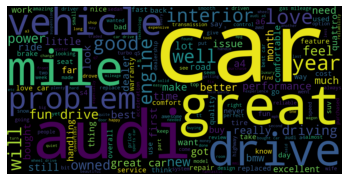

In [44]:
audi_file = "audi.png"

audi_object = wordcloud(review_audi, audi_file)

audi_object.draw_wordcloud()


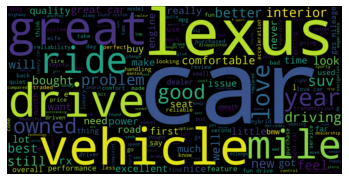

In [46]:
#we create a wordcloud for lexus

lexus_file = "lexus.png"

lexus_object = wordcloud(review_lexus, lexus_file)

lexus_object.draw_wordcloud()


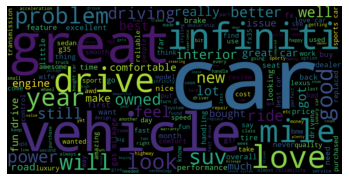

In [47]:
# a word cloud for infiniti

infiniti_file = "infiniti.png"
infiniti_object= wordcloud(review_infiniti, infiniti_file)

infiniti_object.draw_wordcloud()

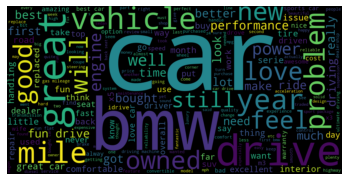

In [48]:
#a word cloud for bmw

bmw_file = "bmw.png"

bmw_object = wordcloud(review_bmw, bmw_file)

bmw_object.draw_wordcloud()

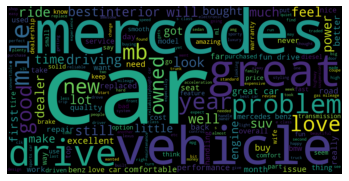

In [50]:
#word cloud for mercedes

mercedes_file = "mercedes.png"
mercedes_object = wordcloud(review_mercedes, mercedes_file)

mercedes_object.draw_wordcloud()

**Conclusion**

Automating stuff in python is fun.   
After reviewing the images, the reviews are too shallow to produce anything useful. 

I will try use job descriptions another time  

However, this project has demostrated how to automate stuff in python